# Ensemble Methods
In this module, we will explore the use of ensemble methods, where instead of using one model, we combine multiple models together to get (hopefully) more accurate results. We will explore two types of ensemble methods: bagging and random forests. First, we'll start with bagging.

## Bagging
In order to understand Random Forests, we have to first understand bagging. Bagging is the idea of using a lot of different learners/models for various different datasets and then aggregating them together. In fact, the word "bagging" comes from the combination of two words: "bootstrap" and "aggregating".

### Import Libraries
Let's start by importing some of the necessary and loading the load wine data set.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns 

# The artificial data will be taken from sklearn (make_moons)
from sklearn.datasets import load_wine

data, target = load_wine(return_X_y=True, as_frame=True)

### Plot Magnesium vs. Non-Flavanoid Phenols
Similar to our other models, let's plot the different classes using the attributes of magnesium and non-flavanoid phenols.

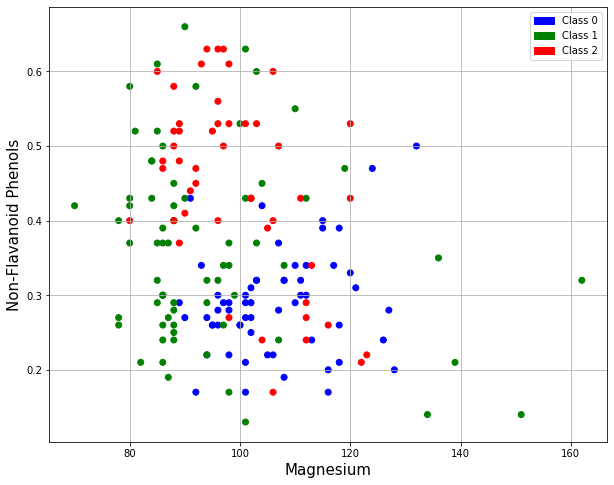

In [3]:
colors = ["red" if label == 2 else "green" if label == 1 else "blue" for label in target]
X = data[["magnesium",
          "nonflavanoid_phenols"]].to_numpy() 

y = target.to_numpy()
plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1], c = colors)
plt.xlabel("Magnesium", fontsize = 15)
plt.ylabel("Non-Flavanoid Phenols", fontsize = 15)

#Plot legend
import matplotlib.patches as mpatches
Class_0 = mpatches.Patch(color='blue', label='Class 0')
Class_1 = mpatches.Patch(color='green', label='Class 1')
Class_2 = mpatches.Patch(color='red', label='Class 2')
plt.legend(handles=[Class_0, Class_1, Class_2])
plt.grid(True)
plt.show()

### Split Data
Now let's split our data into training and testing data.

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 42)

### Import Bagging Classifier
We will now import the Bagging Classifier from Scikit-Learn. In order to perform Bagging, we also have to import the Decision Tree Classifer from Scikit Learn. What the bagging classifier is doing is that it is splitting the training data into smaller sections of overlapping data and then having the decision tree data classify the data. For our decision tree classifier, we are using what we call "dumb learners". These are learners that barely perform better than random guessing. In this case, we are setting the decision tree classifier to a maximum depth of 1. However, although we are using dumb learners, we have a lot of them (in this case 100), so that when their results are aggregated together, we should get pretty accurate results.

In [24]:
from sklearn.tree import DecisionTreeClassifier #use decision tree
from sklearn.ensemble import BaggingClassifier #use bagging classifier


bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=42), 
                            n_estimators = 100,
                            bootstrap = True,
                            n_jobs = -1)
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                        random_state=42),
                  n_estimators=100, n_jobs=-1)

### Plot Decision Regions
Let's plot the decision regions for the bagging classifier to visually check how we did. Although usually Bagging is more powerful than decision trees, in this case it doesn't seem to be too powerful. There seem to be a lot of misclassifications.

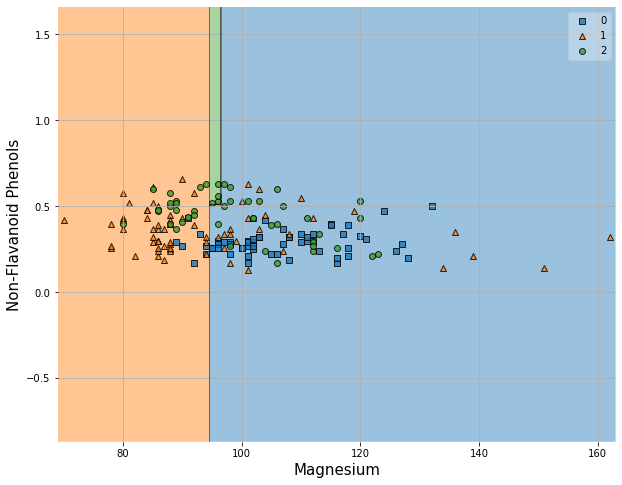

In [25]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = bag_clf)
plt.xlabel("Magnesium", fontsize = 15)
plt.ylabel("Non-Flavanoid Phenols", fontsize = 15)
plt.grid()
plt.show()

### Display Classification Reports
Let's compare the classification reports for a decision tree with a max depth of five and our bagging model. Indeed, we can see that our bagging model actually performed worse than our decision tree classifier.

In [26]:
from sklearn.metrics import classification_report

tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, tree_y_pred), "\n")

bag_y_pred = bag_clf.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")

Tree Classification Report
              precision    recall  f1-score   support

           0       0.72      0.69      0.71        26
           1       0.56      0.81      0.67        27
           2       0.88      0.37      0.52        19

    accuracy                           0.65        72
   macro avg       0.72      0.63      0.63        72
weighted avg       0.70      0.65      0.64        72
 

Bagging Classification Report
              precision    recall  f1-score   support

           0       0.53      0.81      0.64        26
           1       0.57      0.63      0.60        27
           2       1.00      0.11      0.19        19

    accuracy                           0.56        72
   macro avg       0.70      0.51      0.47        72
weighted avg       0.67      0.56      0.50        72
 



### Try smarter learners
Maybe we need to use slightly smart learners. Let's see what happens when we change the max depth to 3. First, we run the bagging classifier.

In [29]:
bag_clf2 = BaggingClassifier(DecisionTreeClassifier(max_depth=3, random_state=42), 
                            n_estimators = 100,
                            bootstrap = True,
                            n_jobs = -1)
bag_clf2.fit(X_train, y_train) #only one max_depth
bag_y_pred2 = bag_clf2.predict(X_test)

### Plot Decision Regions
Now let's plot the decision regions. As we can see, the regions look a lot more accurate.

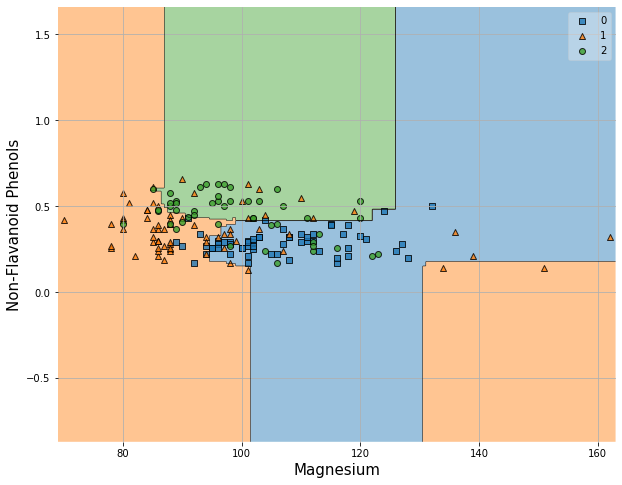

In [31]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = bag_clf2)
plt.xlabel("Magnesium", fontsize = 15)
plt.ylabel("Non-Flavanoid Phenols", fontsize = 15)
plt.grid()
plt.show()

### Plot Classification Matrix
We can also look at the classification matrix. Looks pretty good!

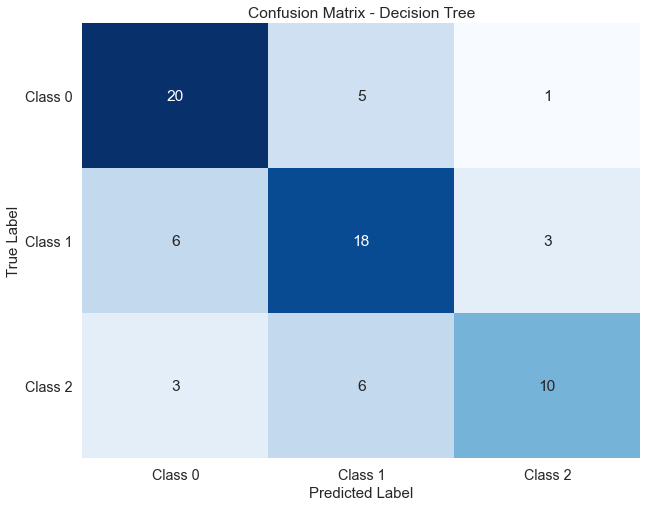

In [33]:
# Import metrics from sklearn 
from sklearn import metrics

# Note: visualizing your tree above will be weird after running seaborn
import seaborn as sns

# The confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, bag_y_pred2)

# Convert confusion matrix into dataframe
matrix_df = pd.DataFrame(confusion_matrix)


plt.figure(figsize=(10, 8))
ax = plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df,
            annot = True, 
            fmt = "g",
            ax = ax, 
            cmap = "Blues", 
            cbar = False)

ax.set_title("Confusion Matrix - Decision Tree")
ax.set_xlabel("Predicted Label", fontsize=15)
ax.set_xticklabels(["Class 0", "Class 1", "Class 2"])
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(["Class 0", "Class 1", "Class 2"], rotation=0)
plt.show()

### Compare Classification Reports
Finally, we can compare classification reports. Yay! As we can see, the bagging classifier that uses a max depth of 3 performs better than both the decision tree classifier and our previously classifier. This shows that by playing with the different variables, bagging can be more powerful than the decision tree and is our most powerful learner yet.

In [35]:
print(f"Bagging Classification Report, max depth = 3")
print(classification_report(y_test, bag_y_pred2), "\n")

print(f"Tree Classification Report")
print(classification_report(y_test, tree_y_pred), "\n")


print(f"Bagging Classification Report, max depth = 1")
print(classification_report(y_test, bag_y_pred), "\n")

Bagging Classification Report, max depth = 3
              precision    recall  f1-score   support

           0       0.69      0.77      0.73        26
           1       0.62      0.67      0.64        27
           2       0.71      0.53      0.61        19

    accuracy                           0.67        72
   macro avg       0.67      0.65      0.66        72
weighted avg       0.67      0.67      0.66        72
 

Tree Classification Report
              precision    recall  f1-score   support

           0       0.72      0.69      0.71        26
           1       0.56      0.81      0.67        27
           2       0.88      0.37      0.52        19

    accuracy                           0.65        72
   macro avg       0.72      0.63      0.63        72
weighted avg       0.70      0.65      0.64        72
 

Bagging Classification Report, max depth = 1
              precision    recall  f1-score   support

           0       0.53      0.81      0.64        26
        

## Random Forests
We now move on to random forests. Random forests utilizes the same concept as bagging, but introduces even more randomness into the data. For bagging, although we chose random samples for our models to analyze, they chose from the same set of features and chose the best features out of the same set. This means that many of the models end up classifying the data in the same biased way. To get rid of this bias, random forests uses a random subset of these features so that the models perform differently every time.

### Run Random Forest
We will start by running the random forest model. This model also comes from Scikit-Learn. We will also start back with a max depth of one, or very dumb learners and running the classification report. Unfortunately, it doesn't look too accurate, but we can see that it is still more accurate than the bagging classifier of max depth = 1.

In [51]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(max_depth = 1, n_estimators = 100,
                            bootstrap = True,
                            n_jobs = -1,
                            random_state = 42)
forest_clf.fit(X_train, y_train)
forest_y_pred = forest_clf.predict(X_test)
print(f"Forest Classification Report")
print(classification_report(y_test, forest_y_pred), "\n")

Forest Classification Report
              precision    recall  f1-score   support

           0       0.69      0.85      0.76        26
           1       0.57      0.63      0.60        27
           2       0.70      0.37      0.48        19

    accuracy                           0.64        72
   macro avg       0.65      0.61      0.61        72
weighted avg       0.65      0.64      0.63        72
 



### Use Smarter Learners
Now let's see what happens when we use smarter learners, like a max depth of 3. We can also increase the number of learners to 500. We can see that the model is already performing better than the max depth of only 1 and 100 learners.

In [55]:
forest_clf2 = RandomForestClassifier(max_depth = 3, n_estimators = 500,
                            bootstrap = True,
                            n_jobs = -1,
                            random_state = 42)
forest_clf2.fit(X_train, y_train)
forest_y_pred2 = forest_clf2.predict(X_test)

print(f"Forest Classification Report, max depth = 1")
print(classification_report(y_test, forest_y_pred), "\n")

print(f"Forest Classification Report, max depth = 3")
print(classification_report(y_test, forest_y_pred2), "\n")

Forest Classification Report, max depth = 1
              precision    recall  f1-score   support

           0       0.69      0.85      0.76        26
           1       0.57      0.63      0.60        27
           2       0.70      0.37      0.48        19

    accuracy                           0.64        72
   macro avg       0.65      0.61      0.61        72
weighted avg       0.65      0.64      0.63        72
 

Forest Classification Report, max depth = 3
              precision    recall  f1-score   support

           0       0.70      0.73      0.72        26
           1       0.61      0.70      0.66        27
           2       0.71      0.53      0.61        19

    accuracy                           0.67        72
   macro avg       0.68      0.65      0.66        72
weighted avg       0.67      0.67      0.66        72
 



### Compare Classification Reports
We can also compare our random forest model to that of the bagging model. Although the random forest model is in theory more powerful than the bagging model, in this case, bagging seems to perform the same as random forests. However, I think that this is more due to the fact that our data can only be classified in so many ways and we have sort of reached the best that any model can do. However, we should note that we have come a long way from our first models. Using bagging and random forest, we can already get our accuracy up to 67%, which is a lot higher than when our first models were just guessing one type of class for all the data. Also, we started with binary classification, but now we can even classify multiple classes.

In [57]:
print(f"Forest Classification Report, max depth = 3")
print(classification_report(y_test, forest_y_pred2), "\n")
print(f"Bagging Classification Report, max depth = 3")
print(classification_report(y_test, bag_y_pred2), "\n")

Forest Classification Report, max depth = 3
              precision    recall  f1-score   support

           0       0.70      0.73      0.72        26
           1       0.61      0.70      0.66        27
           2       0.71      0.53      0.61        19

    accuracy                           0.67        72
   macro avg       0.68      0.65      0.66        72
weighted avg       0.67      0.67      0.66        72
 

Bagging Classification Report, max depth = 3
              precision    recall  f1-score   support

           0       0.69      0.77      0.73        26
           1       0.62      0.67      0.64        27
           2       0.71      0.53      0.61        19

    accuracy                           0.67        72
   macro avg       0.67      0.65      0.66        72
weighted avg       0.67      0.67      0.66        72
 



### Plot Decision Regions
Now just to visually see our classification, we can plot the decision regions for our random forests classifier of max depth = 3. While there are some weird lines due to random forests placing too much emphasis on outliers, the model looks pretty good!

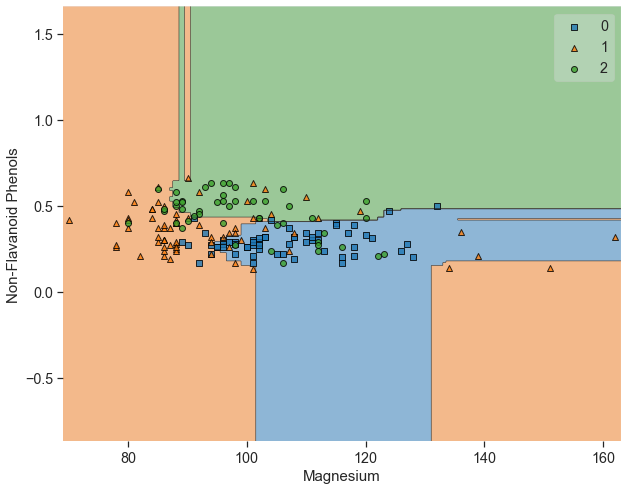

In [59]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = forest_clf2)
plt.xlabel("Magnesium", fontsize = 15)
plt.ylabel("Non-Flavanoid Phenols", fontsize = 15)
plt.grid()
plt.show()

## Analyzing Quality of White Wine
Now that we see how powerful bagging and random forests can be, let's use bagging and random forests on another one of our datasets: the quality of white wine dataset. Using various attributes of white wine, we can see if we can accurately predict the quality of white wine, as well as determine which attributes are most important.

### Load Data
We will start by loading and sorting the data.

In [86]:
white = pd.read_csv("winequality-white.csv")
del white["type"]

X = white.drop(["quality"], axis = 1).to_numpy()
y = white["quality"].to_numpy()

### Split Data
Now we split the data into training and testing data.

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 2)

### Implement Random Forests
Now let's implement random forests on our white wine quality dataset and print out the classification report. We will use pretty smart learners for this model (max depth = 5), as we have a lot of data to sort through, as well as a lot of learners (number of estimators = 500). As we can see from this report, it did a decent job at guessing the quality of wine. However, it wasn't able to guess any of the qualities of 3, 4, 8, and 9 correctly. Of course, this shows us the importance of having a dataset that contains roughly the same amount of points for each target. Because there were so many wines with quality of 5, 6, and 7, these were much easier to classify. Then again, we should still be amazed at how well we were able to classify wine quality just based on a few attributes! After all, we got about 55% accuracy!

In [90]:
forest_clf = RandomForestClassifier(max_depth = 5, 
                                    n_estimators = 500,
                                    bootstrap = True,
                                    n_jobs = -1, random_state=42)
forest_clf.fit(X_train, y_train)
forest_y_pred = forest_clf.predict(X_test)
print(f"Forest Classification Report")
print(classification_report(y_test, forest_y_pred), "\n")

Forest Classification Report
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00        65
           5       0.63      0.55      0.58       583
           6       0.52      0.80      0.63       870
           7       0.58      0.18      0.27       360
           8       0.00      0.00      0.00        72
           9       0.00      0.00      0.00         3

    accuracy                           0.55      1960
   macro avg       0.25      0.22      0.21      1960
weighted avg       0.52      0.55      0.50      1960
 



C:\Users\wwang\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wwang\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wwang\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Implement Bagging Classifier
We can also implement a bagging classifier and see how we do in classification. We will use the same max depth of 5 and number of estimaters of 500. When we display the classification report, we can see that the bagging classifier did roughly the same as the random forest classifier. However, bagging was able to classify more of the qualities of wine, which is really interesting. Overall, though, both models performed surprisingly well!

In [92]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=5, random_state=42), 
                            n_estimators = 500,
                            bootstrap = True,
                            n_jobs = -1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)

print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")

Bagging Classification Report
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       1.00      0.02      0.03        65
           5       0.62      0.58      0.60       583
           6       0.53      0.78      0.63       870
           7       0.60      0.24      0.34       360
           8       1.00      0.01      0.03        72
           9       0.00      0.00      0.00         3

    accuracy                           0.56      1960
   macro avg       0.54      0.23      0.23      1960
weighted avg       0.60      0.56      0.52      1960
 



C:\Users\wwang\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wwang\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wwang\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Feature Importance 

One cool thing about random forests is that Scikit-Learn can analyze feature importance based on the purity of a split of an attribute. We can thus print out the importance of each attribute and see which attributes are most important in determining the quality of a wine. As we can see, alcohol content, density and volatile acidity seem to be the most important in determining the quality of a wine, which is incredibly interesting.

If you don't know what volatile acidity is (I didn't), it is a measure of a wine's gaseous acids and is an indicator of spoilage. Although a little volatile acidity is fine, too much means bad grapes and bad wine processes. Although many factors make up the volatile acidity of a wine, the main type of acid that winemakers focus on is acetic acid, which if too much is present, causes that taste of nail polish remover.

In [77]:
names = ["fixed_acidity", "volatile_acidity", "citric_acid", "residual_sugar", 
           "chlorides", "free_sulfur_dioxide", "total_sulfur_dioxide", "density",
           "pH", "sulphates", "alcohol"]
for name, score in zip(names, forest_clf.feature_importances_):
   print(name, score)

fixed_acidity 0.026899293497569535
volatile_acidity 0.14946108778871198
citric_acid 0.043987734816117396
residual_sugar 0.061804003697338336
chlorides 0.08093960680910395
free_sulfur_dioxide 0.06272506940513674
total_sulfur_dioxide 0.05733668643887068
density 0.15130512891832465
pH 0.03963244803627157
sulphates 0.02955036842181901
alcohol 0.29635857217073613


### Plot Alcohol vs. Density
We can also plot alcohol vs. density. In the linear regression module, we had guessed that the most important attributes of white wine were alcohol and density, and we were correct! However, using random forests is a more precise way of determining wine quality. We can see that higher alcohol content equates to higher quality white wine, while the opposite is true for density, where lower density seems to equate to higher quality wine.

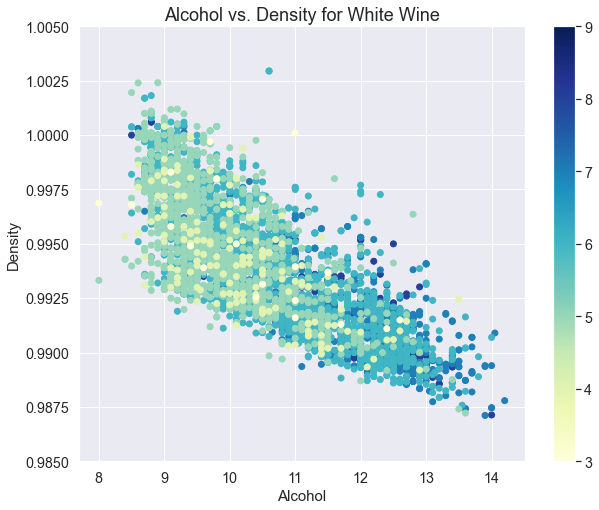

In [98]:
plt.figure(figsize = (10, 8))
plt.scatter(white.alcohol, 
            white.density, 
            c = white.quality,
            cmap = "YlGnBu")
plt.xlabel("Alcohol", fontsize = 15)
plt.ylabel("Density", fontsize = 15)
plt.ylim((0.985, 1.005))
plt.title("Alcohol vs. Density for White Wine", fontsize = 18)
plt.colorbar()
plt.show()

### Plot Density vs. Volatile Acidity
Just for fun, let's also plot Density vs. Volatile Acidity. We can see that as the definition of volatile acidity explains, lower volatile acidity generally means higher quality wine.

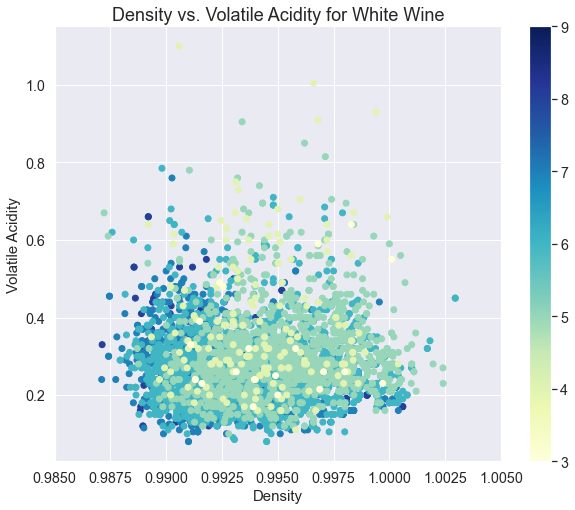

In [99]:
plt.figure(figsize = (10, 8))
plt.scatter(white.density, 
            white.volatile_acidity, 
            c = white.quality,
            cmap = "YlGnBu")
plt.xlabel("Density", fontsize = 15)
plt.ylabel("Volatile Acidity", fontsize = 15)
plt.title("Density vs. Volatile Acidity for White Wine", fontsize = 18)
plt.xlim((0.985, 1.005))
plt.colorbar()
plt.show()

### Plot Alcohol and Volatile Acidity
... and alcohol vs. volatile acidity

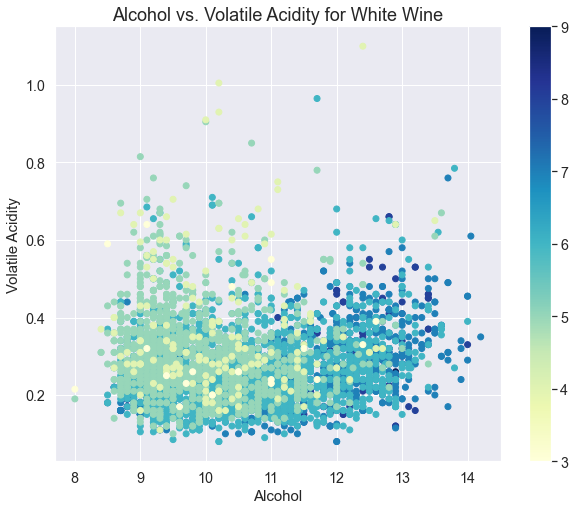

In [100]:
plt.figure(figsize = (10, 8))
plt.scatter(white.alcohol, 
            white.volatile_acidity, 
            c = white.quality,
            cmap = "YlGnBu")
plt.xlabel("Alcohol", fontsize = 15)
plt.ylabel("Volatile Acidity", fontsize = 15)
plt.title("Alcohol vs. Volatile Acidity for White Wine", fontsize = 18)
plt.colorbar()
plt.show()

## Takeaways
We learned a lot of different things from this module. First, we found our most powerful models yet: bagging and random forests. We also compared these two methods and saw that sometimes one might perform better than the other, and how sometimes we also need more powerful learners. Also, we analyzed the features of white wine to try and determine the most important attributes, which we found to be alcohol content, density, and volatile acidity. What I think is really interesting from these important attributes is that most of them are really easy for consumers to measure. While there are a lot of complex attributes like chlorides or total sulfur dioxide which probably require more sophisticated instruments to measure, the top two most important attributes are alcohol content and density. Alcohol content is extremely easy for consumers to find. You don't even need to open a bottle of wine. You can just read the label. Also, density, is also pretty easy to measure too. Although it requires more work than alcohol content to measure, you definitely have the right equipment at home if you really wanted to measure it.